# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
# YOUR CODE HERE
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [4]:
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(bookReviewDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [6]:
df.shape

(1973, 2)

In [7]:
# YOUR CODE HERE
print(df['Positive Review'].value_counts())

False    993
True     980
Name: Positive Review, dtype: int64


<b> There is a slight imbalance but not enough to make a drastic difference. </b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


## Part 3: Implement Your Project Plan

<b>Task:</b> 

1. Create Labeled Examples 
2. Pre-Process Text
3. Create Training and Test Data
4. Convert Feature into Word Embeddings
5. Create Feature Vector from Word Embeddings
6. 

<b> 3.1 Creating Labeled Examples <b>

In [9]:
y = df['Positive Review']
X = df['Review']

X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [10]:
X.shape

(1973,)

<b>3.2 Pre Process Text </b>

    Preprocessing technqiues can include cleaning the data, converting all text to lowercase, removing special characters, removing stopwords from the text, tokenizing the text (split it into smaller chunks), and lemmatizing the text (converting a word to its root word).

In [11]:
original_X = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))

In [12]:
original_X.head

<bound method NDFrame.head of 0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object>

In [13]:
X.head

<bound method NDFrame.head of 0       [this, was, perhaps, the, best, of, johannes, ...
1       [this, very, fascinating, book, is, story, wri...
2       [the, four, tales, in, this, collection, are, ...
3       [the, book, contained, more, profanity, than, ...
4       [we, have, now, entered, second, time, of, dee...
                              ...                        
1968    [purchased, the, book, with, the, intention, o...
1969    [there, are, so, many, design, books, but, the...
1970    [am, thilled, to, see, this, book, being, avai...
1971    [as, many, have, stated, before, me, the, book...
1972    [love, this, book, it, is, terrific, blend, of...
Name: Review, Length: 1973, dtype: object>

<b> 3.3 Create Training and Test Data </b>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1234)

X_train.head()

1369    [as, my, brother, said, when, flipping, throug...
1366    [cooper, book, is, yet, another, warm, and, fu...
385     [have, many, robot, books, and, this, is, the,...
750     [as, china, re, emerges, as, dominant, power, ...
643     [have, been, huge, fan, of, michael, crichton,...
Name: Review, dtype: object

<b> 3.4 Word Embeddings </b>


    Word embeddings allow us to represent textual data in a numerical format that can be used as input to machine learning models. This transformation of words into numerical values enables us to perform various NLP tasks, such as text classification, sentiment analysis, machine translation, and information retrieval, using traditional machine learning algorithms or neural networks.

In [15]:
print("Begin")
word2vec_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

Begin
End


<b> 3.5 Create Feature Vectors out of Word Embeddings for a Classifier </b>

Convert the features in our training and test datasets into feature vectors using our word embeddings.

In [16]:
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [17]:
print('Number of words in first training example: {0}'.format(len(X_train.iloc[0])))
print('First word in first training example: {0}'.format(X_train.iloc[0][0]))
print('Second word in first training example: {0}\n'.format(X_train.iloc[0][1]))

print('Number of word vectors in first training example: {0}'.format(len(X_train_word_embeddings[0])))
print('First word vector in first training example:\n {0}'.format(X_train_word_embeddings[0][0]))
print('\nSecond word vector in first training example: \n {0}\n'.format(X_train_word_embeddings[0][1]))


Number of words in first training example: 145
First word in first training example: as
Second word in first training example: my

Number of word vectors in first training example: 100
First word vector in first training example:
 [ 3.6640831e-03  1.7966239e-02  5.0647049e-03 -8.8436046e-04
  4.9296184e-03 -1.7056204e-02  1.5470027e-02  1.1814145e-02
 -5.1759393e-03 -7.5902883e-03 -2.8863437e-03 -1.5729688e-02
 -9.0118572e-03 -2.6625202e-03  1.7772289e-02 -1.2001048e-02
  1.2800958e-02 -1.2110786e-02 -9.8789787e-05 -2.7804136e-02
 -1.2081577e-02  4.2028073e-03  1.7536640e-02 -1.2048188e-02
  6.0701710e-03  1.0691473e-02 -1.6657118e-03 -4.6403874e-03
 -3.0210363e-03  5.0596846e-04  1.5123989e-02  2.3086076e-03
 -9.7690718e-03 -1.6763378e-02  1.6561753e-04  2.2968765e-02
  1.1237907e-02 -5.5439901e-03  1.2749506e-03 -1.4018878e-02
  1.0213033e-02 -1.0227942e-02 -1.4418796e-02  2.2467705e-03
 -1.2817543e-03 -1.3088736e-02  3.6360566e-03 -4.5069885e-03
  5.0537987e-03  4.0795347e-03 -1.694

In [18]:
print('Number of word vectors in first five examples in training set:')
for w in range(0, 5):
    print(len(X_train_word_embeddings[w]))

print('Number of word vectors in first five examples in test set:')
for w in range(0, 5):
    print(len(X_test_word_embeddings[w]))

Number of word vectors in first five examples in training set:
100
71
87
139
101
Number of word vectors in first five examples in test set:
124
77
111
41
21


We have to create feature vectors that will provide our classifier with a consistent set of features per example.

We can take an element-wise average of the word embeddings of the words contained in each training and test example. This makes a feature vector representation that can be used as training and test features for our classifier.

Each example now consists of one feature, which is a numerical feature vector of length 100. Run the code cell below to inspect the first five training examples.

In [19]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(150, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(150, dtype=float))

In [20]:
for w in range(0, 5):
    print('Length of training example {0}: {1}'.format(w, len(X_train_feature_vector[w])))
    
print('First training example\'s feature vector: \n{0}'.format(X_train_feature_vector[0]))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100
First training example's feature vector: 
[-0.07272931  0.2805759   0.1139539   0.00454711  0.1250335  -0.7041733
  0.48882076  1.0423342  -0.32752046 -0.30199182  0.00294627 -0.63690436
 -0.21496452  0.0460893   0.13264841 -0.17701831  0.12752472 -0.51624835
 -0.20305653 -1.0497158   0.10521045  0.19227877  0.5917506  -0.2621206
 -0.07681517  0.23248616 -0.2644822  -0.30317295 -0.34163702  0.06124347
  0.58422834 -0.04472991  0.4324615  -0.54802126 -0.32808414  0.4498863
  0.24694912 -0.23293275 -0.33913267 -0.75269014  0.04792916 -0.4074559
 -0.04493143 -0.1755488   0.4049364  -0.18733272 -0.13909955  0.03405226
  0.38920513  0.4013157   0.02082505 -0.45979825 -0.25381428  0.06942792
 -0.26257893  0.11553618  0.26713675 -0.14008333 -0.35186577  0.23333853
  0.2267258   0.03757839  0.29321083  0.21190712 -0.46159068  

<b> 3.6 Fit a Logistic Regression Model to the Training Data and Evaluate the Model </b>

In [32]:

# 1. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
demo_LR_model = LogisticRegression(max_iter=1000)
demo_LR_model.fit(X_train_feature_vector, y_train)

# 2. Make predictions on the transformed test data using the predict_proba() method and 
# save the values of the second column
demo_LR_probability_predictions = demo_LR_model.predict_proba(X_test_feature_vector)[:,1]

# 3. Make predictions on the transformed test data using the predict() method 
demo_class_label_predictions = demo_LR_model.predict(X_test_feature_vector)

# 4. Compute the Area Under the ROC curve (AUC) for the test data. Note that this time we are using one 
# function 'roc_auc_score()' to compute the auc rather than using both 'roc_curve()' and 'auc()' as we have 
# done in the past
demo_LR_auc = roc_auc_score(y_test, demo_LR_probability_predictions)
print('AUC on the test data: {:.4f}'.format(demo_LR_auc))

AUC on the test data: 0.7201


<b> Findings </b>

AUC stands for "Area Under the Curve." In the context of machine learning and binary classification, the AUC is a performance metric used to evaluate the quality of a classification model's predictions.

A perfect classifier that can perfectly separate the positive and negative samples will have an AUC of 1.0, while a random or poor classifier will have an AUC of approximately 0.5.

<b> Initial AUC : 0.72 </b>
    - Decent Performance for a simple Logistic Regression model with max_iter = 1000
    - Default C hpyer parameter

<b> TO DO : </b>
1. Hyperparameter for logistic regression
2. model exploration random forrest, neural network
3. analysis

<b> Hyper Parameter Exploration for Logistic Regression <b>

In [28]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train_feature_vector, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [0.08102799131028603,
  0.23730218633337008,
  0.6949737581789094,
  2.035331119447836,
  5.960761420183505,
  17.45695153424823,
  51.12520622570223,
  149.72755732824717,
  438.4987969439847,
  1284.2071182647064,
  3760.9861967589713,
  11014.591782768706,
  32257.824356171306,
  94471.70196733669,
  276674.03647753596,
  810279.9131028602]}

In [33]:
from sklearn.model_selection import GridSearchCV
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
# YOUR CODE HERE
lr_model = LogisticRegression(max_iter=1000)


# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
# YOUR CODE HERE
grid = GridSearchCV(lr_model, param_grid, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
# YOUR CODE HERE
grid_search = grid.fit(X_train_feature_vector, y_train)

print('Done')

Running Grid Search...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<b> Best Hyperparameter C <b>

In [34]:
best_c = grid_search.best_score_
best_c

0.7053465943339361

In [36]:
best_lr_model = LogisticRegression(max_iter=1000, C=best_c)
best_lr_model.fit(X_train_feature_vector, y_train)

LogisticRegression(C=0.7053465943339361, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# 1. Make predictions on the test data using the predict_proba() method
# YOUR CODE HERE
proba_predictions_best_lr_model = best_lr_model.predict_proba(X_test_feature_vector)[:,1]

# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_best_best_lr_model = best_lr_model.predict(X_test_feature_vector)

In [40]:
best_lr_model_roc = roc_auc_score(y_test, proba_predictions_best_lr_model)
print('AUC on the test data: {:.4f}'.format(demo_LR_auc))

AUC on the test data: 0.7201


<b> Findings <b>
    - Logistic Regression Model did not improve as much despite hyperparameter exploration. LR may not be the best model for this problem.
    
    - We will try to find another model that will perform better
    
   

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc



In [56]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor()

rf_model.fit(X_train_feature_vector, y_train)


y_rf_pred = rf_model.predict(X_test_feature_vector)

# 4. Compute the RMSE and R2 (on y_test and y_rf_pred) and save the results to rf_rmse and rf_r2
# YOUR CODE HERE
rf_rmse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print('End')

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


Begin RF Implementation...
End
[RF] Root Mean Squared Error: 0.21363772151898733
[RF] R2: 0.14539981796738777


<b> FINDINGS for RF <b>
    - Default metrics for our RF is really low, It is not necessary to do further exploration.

<b> Neural Network Exploration <b>

In [79]:
import tensorflow.keras as keras
from sklearn.feature_extraction.text import TfidfVectorizer
import time

In [80]:
# SPLIT FOR NEURAL NETWORK 
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(original_X, y, test_size=0.20, random_state=1234)

In [81]:
# 1. Create a TfidfVectorizer object 
# YOUR CODE HERE
tfidf_vectorizer = TfidfVectorizer()


# 2. Fit the vectorizer to X_train
# YOUR CODE HERE
tfidf_vectorizer.fit(nn_X_train)

# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf = tfidf_vectorizer.transform(nn_X_train)


# 4. Using the fitted vectorizer, transform the test data 
# YOUR CODE HERE
X_test_tfidf = tfidf_vectorizer.transform(nn_X_test)


In [82]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


In [84]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
print('Done...')

Done...


In [85]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
print('Done...')

Done...


In [83]:
# 1. Create model object
nn_model = keras.Sequential()



# 2. Create the input layer and add it to the model object: 

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))

# Add input_layer to the model object:
nn_model.add(input_layer)




# 3. Create the first hidden layer and add it to the model object:

# Create input layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')

# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(0.25))



# 4. Create the second layer and add it to the model object:

# Create input layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')

# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(0.25))


# 5. Create the third layer and add it to the model object:

# Create input layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')

# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(0.25))


# 6. Create the output layer and add it to the model object:

# Create input layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')

# Add output_layer to the model object:
# YOUR CODE HERE

nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1217920   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [86]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])
print("Done...")

Done...


In [87]:
# CUSTOM CALL BACK FUNCTION 
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [90]:
print('Running ...')

num_epochs = 200 #epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)], validation_split=0.2)


Running ...
Epoch [50/ 200], Loss: 0.4106, Accuracy: 0.8510, Val_loss: 0.6317, Val_accuracy: 0.6297
Epoch [100/ 200], Loss: 0.0413, Accuracy: 0.9873, Val_loss: 0.5872, Val_accuracy: 0.8228
Epoch [150/ 200], Loss: 0.4427, Accuracy: 0.8479, Val_loss: 0.4190, Val_accuracy: 0.8228
Epoch [200/ 200], Loss: 0.0224, Accuracy: 0.9937, Val_loss: 1.0320, Val_accuracy: 0.7975


<b> Findings:  <b> 
    best performance is when epoch = 100
    - Training Accuracy: 84.79%
    - Validation Accuracy: 82.28%


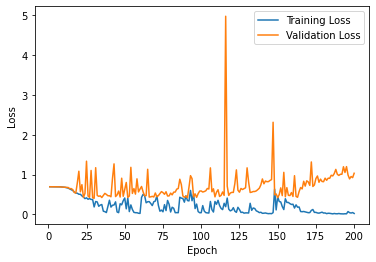

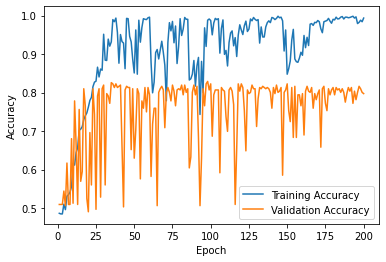

In [91]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## DEMO PREDICTIONS 

In [92]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.99973845]			Good Review
[0.98032546]			Good Review
[0.00358665]			Bad Review
[0.00301388]			Bad Review
[0.9974134]			Good Review
[0.96243596]			Good Review
[8.758438e-05]			Bad Review
[5.627438e-06]			Bad Review
[0.99997103]			Good Review
[0.999931]			Good Review


In [93]:
print('Review #1:\n')
print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #1:

['this', 'commentary', 'has', 'many', 'tremendous', 'insights', 'into', 'the', 'book', 'of', 'romans', 'romans', 'is', 'one', 'of', 'the', 'richest', 'resources', 'of', 'truth', 'within', 'the', 'bible', 'and', 'john', 'stoot', 'does', 'good', 'job', 'of', 'unpacking', 'it', 'the', 'book', 'is', 'written', 'from', 'framework', 'of', 'the', 'reader', 'having', 'strong', 'prior', 'understanding', 'of', 'the', 'scriptures', 'it', 'is', 'probably', 'not', 'considered', 'highly', 'scholarly', 'work', 'but', 'it', 'is', 'not', 'for', 'the', 'average', 'reader', 'to', 'pick', 'up', 'for', 'light', 'reading', 'either']

Prediction: Is this a good review? True

Actual: Is this a good review? True



## FINAL FINDINGS 

Ranking of Models Explored
1. Neural Network
2. Logistic Regression
3. Random Forrest

    - Random Forrest was not further explored due to underwhelming initial performance. 
    - Logistic regression peaked at 72% despite undergoing hyper parameter exploration.
    - Neural Network performs best at 82% Validation Accuracy